# Network Science project
## Political Facebook pages

By:
<p> Annika Altoja
<p> Kelli Kukk
<p> Kristin Petersel

## 1. Descriptive analysis
The dataset is from: https://www.kaggle.com/rozemberczki/musae-facebook-pagepage-network

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
edges = pd.read_csv('musae_facebook_edges.csv')
edges.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [ ]:
nodes = pd.read_csv('musae_facebook_target.csv')
nodes.head()
target = nodes["page_type"]
type(target)

pandas.core.series.Series

In [ ]:
import numpy as np
print(np.shape(edges))
print(np.shape(nodes))

(171002, 2)
(22470, 4)


In [ ]:
G_unweighted_undirected = nx.from_pandas_edgelist(edges, source='id_1', target='id_2')

###Number of components

In [ ]:
nx.algorithms.components.number_connected_components(G_unweighted_undirected)

1

###Graph

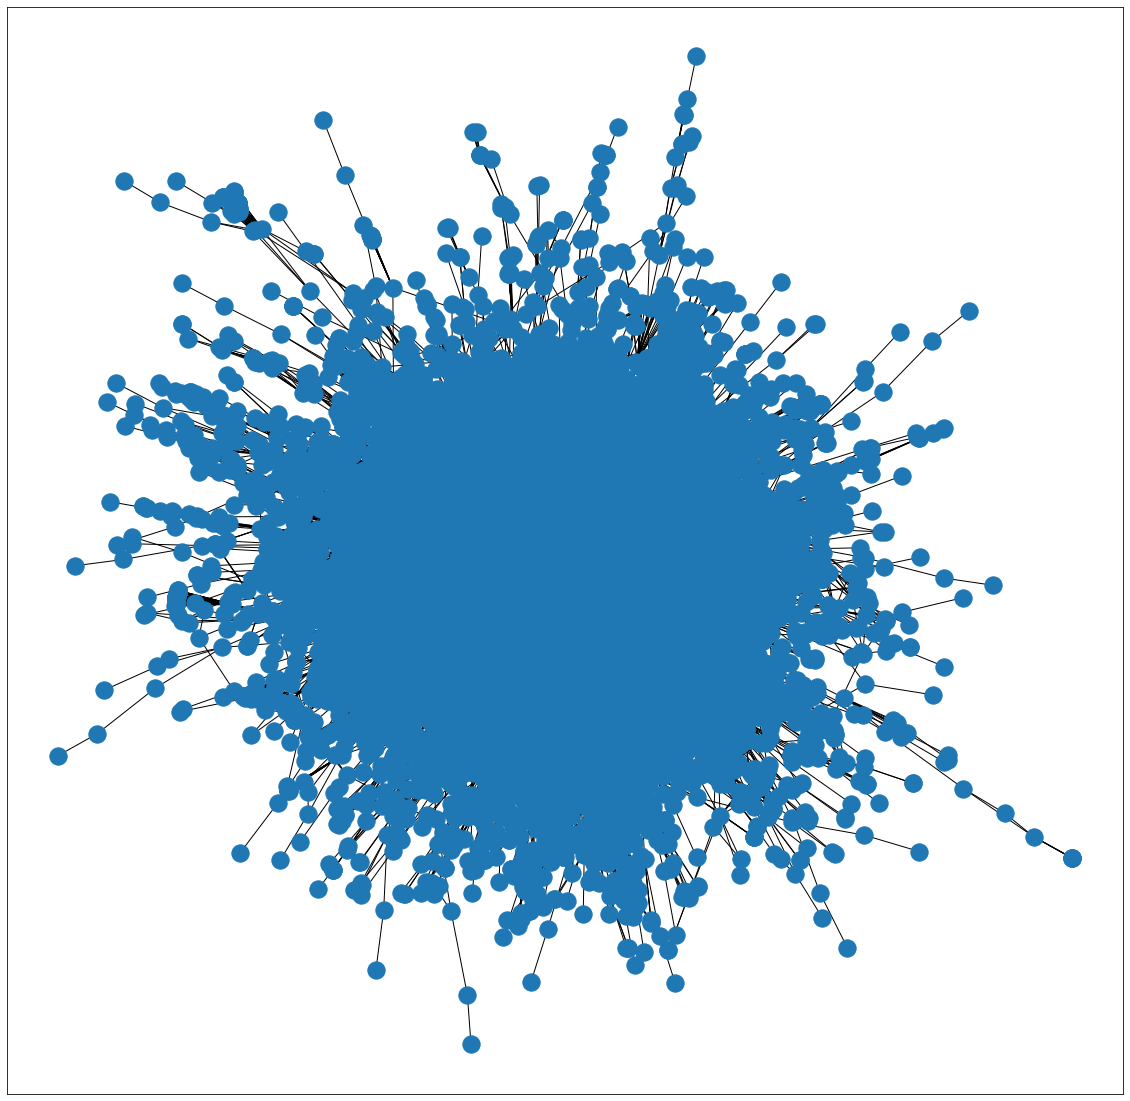

In [ ]:
plt.figure(3,figsize=(20,20))
nx.draw_networkx(G_unweighted_undirected, with_labels = False)

###Min, Max, Average degree

In [ ]:
N, K = G_unweighted_undirected.order(), G_unweighted_undirected.size()
avg_deg = float(K) / N
avg_deg

7.610235870048954

In [ ]:
#Max
degree_sequence = sorted([d for n, d in G_unweighted_undirected.degree()], reverse=True)
max(degree_sequence)

709

In [ ]:
#Min
min(degree_sequence)

1

###Edge density

In [ ]:
nx.classes.function.density(G_unweighted_undirected)
#The edge density is 0.00067, which means that 0.067% of possible edges in the network exist in this network. It is the ratio of existing edges over possible ones.

0.000677398715568023

###Clustering coefficient

In [ ]:
nx.average_clustering(G_unweighted_undirected)
#The clustering coefficient says that 35.9% of the node neighbours are connected with each other in average. This mean that in avarage "35.9% of your liked pages like your other liked pages".

0.3597383824426942

###Average path length

In [ ]:
nx.average_shortest_path_length(G_unweighted_undirected)

4.973703570580348

###Degree centrality

In [ ]:
degree_centrUU = nx.degree_centrality(G_unweighted_undirected)
degree_top4 = sorted(degree_centrUU, key=degree_centrUU.get, reverse=True)[:4]
print(degree_top4)
for i in degree_top4:
  print(nodes[nodes["id"] == i]["page_name"], ", Degree centrality:", degree_centrUU[i])

[16895, 19743, 21729, 14497]
16895    U.S. Army
Name: page_name, dtype: object , Degree centrality: 0.0315545863189283
19743    The White House
Name: page_name, dtype: object , Degree centrality: 0.030174907650540747
21729    The Obama White House
Name: page_name, dtype: object , Degree centrality: 0.029329298144109662
14497    U.S. Army Chaplain Corps
Name: page_name, dtype: object , Degree centrality: 0.028928746272642306


##Communities with Louvain

In [ ]:
import community as community_louvain
lst_m = community_louvain.best_partition(G_unweighted_undirected)
print(len(set(lst_m.values())))

62


In [ ]:
lst_m

{0: 0,
 18427: 0,
 1: 1,
 21708: 1,
 22208: 1,
 22171: 1,
 6829: 1,
 16590: 1,
 20135: 1,
 8894: 1,
 15785: 1,
 10281: 1,
 22265: 2,
 7136: 1,
 22405: 1,
 10379: 1,
 13737: 1,
 8533: 1,
 14344: 1,
 2812: 1,
 5755: 1,
 16260: 1,
 15026: 1,
 17370: 1,
 17460: 1,
 8049: 1,
 5307: 1,
 4987: 1,
 18304: 3,
 12305: 1,
 19743: 1,
 20024: 1,
 21729: 1,
 10554: 2,
 11557: 1,
 5228: 1,
 9934: 1,
 2: 4,
 9048: 4,
 6353: 4,
 2629: 4,
 11537: 4,
 13205: 4,
 22304: 4,
 17728: 4,
 19337: 4,
 126: 4,
 17554: 4,
 8495: 4,
 5857: 4,
 3: 0,
 16742: 5,
 293: 0,
 5826: 0,
 3479: 0,
 19753: 0,
 17346: 0,
 10945: 0,
 22338: 0,
 11319: 0,
 9654: 0,
 4: 6,
 13645: 6,
 20876: 6,
 11446: 6,
 16203: 6,
 2830: 6,
 2004: 6,
 20624: 6,
 21280: 6,
 1182: 6,
 21538: 6,
 1443: 6,
 11423: 6,
 187: 6,
 5730: 6,
 2983: 6,
 1489: 7,
 6823: 6,
 17695: 6,
 11102: 6,
 6390: 6,
 17242: 6,
 10018: 6,
 5147: 6,
 6427: 6,
 14628: 6,
 1882: 6,
 22401: 6,
 16128: 6,
 12872: 6,
 9263: 6,
 14155: 6,
 21631: 6,
 6329: 6,
 17507: 6,
 22

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

lst_m = [lst_m[node] for node in range(len(lst_m))]

nmi = normalized_mutual_info_score(target, lst_m)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2625


#KarateClub
https://github.com/benedekrozemberczki/karateclub
Non-overlapping clusters?
<p> https://karateclub.readthedocs.io/en/latest/notes/introduction.html#community-detection 

In [ ]:
!pip install karateclub

##Non-overlapping community detection

###Label Propagation

In [ ]:

from karateclub import LabelPropagation
model = LabelPropagation()
model.fit(G_unweighted_undirected)
cluster_membership = model.get_memberships()
#cluster_membership

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
cluster_membership

{20127: 3798,
 7160: 19500,
 17139: 3798,
 12958: 20727,
 19482: 4002,
 1023: 3798,
 7720: 280,
 13781: 2321,
 7910: 5590,
 18747: 280,
 22187: 7599,
 5731: 17768,
 7463: 8669,
 7310: 7527,
 18109: 225,
 14597: 280,
 19089: 280,
 19749: 579,
 6575: 1195,
 17415: 280,
 18999: 280,
 14927: 18285,
 2942: 280,
 4000: 145,
 4304: 280,
 22362: 5344,
 15971: 2697,
 1838: 6342,
 8593: 280,
 9096: 280,
 18813: 12766,
 3253: 1331,
 589: 470,
 9897: 470,
 18604: 280,
 21250: 6342,
 19028: 3798,
 11456: 280,
 16485: 2660,
 18970: 280,
 10751: 7527,
 8260: 13552,
 11390: 280,
 17587: 6342,
 8454: 8516,
 7613: 14101,
 10412: 280,
 18340: 3798,
 2372: 3798,
 8002: 280,
 2896: 12731,
 20884: 16494,
 21002: 496,
 2262: 10318,
 4489: 1447,
 21628: 4002,
 10505: 13251,
 1661: 3798,
 4924: 3329,
 19266: 280,
 22233: 576,
 20779: 6685,
 2049: 6342,
 16263: 3166,
 4888: 12813,
 17521: 280,
 2035: 7055,
 16214: 6962,
 9271: 20704,
 10645: 15129,
 4387: 17235,
 4708: 1447,
 14355: 2321,
 4469: 280,
 5389: 606

In [ ]:
u_value = set( val for val in cluster_membership.values())
print("Number of Clusters: ",len(u_value))

Number of Clusters:  701


In [ ]:
print("All unique Clusters: ",u_value)

All unique Clusters:  {2049, 1, 12295, 6153, 6156, 14348, 20496, 4129, 12323, 39, 8241, 20530, 53, 4164, 10308, 14408, 10318, 16464, 4178, 10328, 18524, 10336, 10337, 14435, 6244, 101, 16484, 2155, 18540, 16494, 20591, 4210, 4211, 12404, 16503, 120, 2171, 14463, 16513, 4231, 20620, 145, 8338, 18580, 18581, 12436, 6296, 16536, 12443, 4252, 10396, 12444, 12452, 12456, 173, 18606, 8373, 12470, 16570, 16574, 2238, 2242, 6340, 4293, 6342, 14533, 18630, 2252, 8396, 8401, 20694, 12503, 12504, 20704, 225, 14560, 2272, 8418, 10470, 2284, 18672, 18673, 6386, 20727, 14585, 12538, 20737, 6402, 4355, 12548, 14599, 10505, 6410, 2321, 280, 20767, 12577, 2344, 8489, 2346, 2348, 10541, 18741, 14653, 14656, 8516, 14667, 14669, 8528, 8534, 6487, 344, 4446, 16738, 20835, 6500, 2406, 6502, 360, 8551, 8555, 8556, 12656, 16755, 6517, 4469, 18806, 2426, 10619, 16770, 6541, 4495, 6547, 14739, 14740, 14743, 8600, 6552, 16794, 6554, 12707, 16806, 18854, 12712, 14764, 18861, 430, 2479, 18864, 18872, 12728, 442, 1

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target, cluster_membership)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2634


###GEMSEC

In [ ]:
from karateclub import GEMSEC
model2 = GEMSEC()
model2.fit(G_unweighted_undirected)
cluster_membership_gem = model2.get_memberships()

In [ ]:
cluster_membership_gem

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 6,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 9,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 5,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 2,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 2,
 95: 3,
 96: 2,
 97: 2,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 2,
 105: 2,
 106: 6,
 107: 2,
 108: 2,
 109: 2,
 110: 2,
 111: 2,
 112: 2,
 113: 6,
 114: 2,
 115: 2,
 116: 2,
 117: 2,
 118: 2,
 119: 2,
 120: 2,
 121: 2,
 122: 2,
 12

In [ ]:
u_value_gem = set( val for val in cluster_membership_gem.values())
print("Number of Clusters: ",len(u_value_gem))

Number of Clusters:  10


In [ ]:
print("All unique Clusters: ",u_value_gem)

All unique Clusters:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership_gem = [cluster_membership_gem[node] for node in range(len(cluster_membership_gem))]

nmi = normalized_mutual_info_score(target, cluster_membership_gem)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.0499


###EdMot

In [ ]:
from karateclub import EdMot
model3 = EdMot()
model3.fit(G_unweighted_undirected)
cluster_membership_ed = model3.get_memberships()

In [ ]:
cluster_membership_ed

{0: 11,
 18427: 11,
 1: 1,
 21708: 1,
 22208: 1,
 22171: 1,
 6829: 1,
 16590: 1,
 20135: 1,
 8894: 1,
 15785: 1,
 10281: 1,
 22265: 1,
 7136: 2,
 22405: 1,
 10379: 1,
 13737: 1,
 8533: 1,
 14344: 1,
 2812: 1,
 5755: 1,
 16260: 1,
 15026: 1,
 17370: 1,
 17460: 1,
 8049: 1,
 5307: 1,
 4987: 1,
 18304: 3,
 12305: 4,
 19743: 1,
 20024: 1,
 21729: 1,
 10554: 1,
 11557: 5,
 5228: 1,
 9934: 1,
 2: 6,
 9048: 6,
 6353: 6,
 2629: 6,
 11537: 6,
 13205: 6,
 22304: 6,
 17728: 6,
 19337: 6,
 126: 6,
 17554: 6,
 8495: 6,
 5857: 6,
 3: 4,
 16742: 7,
 293: 4,
 5826: 4,
 3479: 4,
 19753: 4,
 17346: 4,
 10945: 4,
 22338: 4,
 11319: 4,
 9654: 4,
 4: 8,
 13645: 8,
 20876: 8,
 11446: 8,
 16203: 8,
 2830: 8,
 2004: 8,
 20624: 8,
 21280: 8,
 1182: 8,
 21538: 8,
 1443: 8,
 11423: 8,
 187: 8,
 5730: 8,
 2983: 8,
 1489: 37,
 6823: 8,
 17695: 8,
 11102: 8,
 6390: 8,
 17242: 8,
 10018: 8,
 5147: 8,
 6427: 8,
 14628: 8,
 1882: 8,
 22401: 8,
 16128: 8,
 12872: 8,
 9263: 8,
 14155: 8,
 21631: 8,
 6329: 8,
 17507: 8,


In [ ]:
u_value_ed= set( val for val in cluster_membership_ed.values())
print("Number of Clusters: ",len(u_value_ed))

Number of Clusters:  47


In [ ]:
print("All unique Clusters: ",u_value_ed)

All unique Clusters:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership_ed = [cluster_membership_ed[node] for node in range(len(cluster_membership_ed))]

nmi = normalized_mutual_info_score(target, cluster_membership_ed)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2336


###SCD

In [ ]:
from karateclub import SCD
model4 = SCD()
model4.fit(G_unweighted_undirected)
cluster_membership_scd = model4.get_memberships()

In [ ]:
cluster_membership_scd

{0: 10214,
 18427: 557,
 1: 2509,
 21708: 1664,
 22208: 1664,
 22171: 1664,
 6829: 2566,
 16590: 1664,
 20135: 1664,
 8894: 2816,
 15785: 1664,
 10281: 2509,
 22265: 1664,
 7136: 2509,
 22405: 2509,
 10379: 1664,
 13737: 1664,
 8533: 2509,
 14344: 3930,
 2812: 2509,
 5755: 1664,
 16260: 2509,
 15026: 2711,
 17370: 1664,
 17460: 1664,
 8049: 1664,
 5307: 1664,
 4987: 1664,
 18304: 78,
 12305: 5735,
 19743: 1664,
 20024: 1664,
 21729: 1664,
 10554: 3515,
 11557: 2791,
 5228: 1664,
 9934: 1664,
 2: 1845,
 9048: 1845,
 6353: 1845,
 2629: 10215,
 11537: 1845,
 13205: 1845,
 22304: 1845,
 17728: 1845,
 19337: 1845,
 126: 1845,
 17554: 1845,
 8495: 1845,
 5857: 1845,
 3: 1971,
 16742: 4379,
 293: 1971,
 5826: 1971,
 3479: 1971,
 19753: 1971,
 17346: 1971,
 10945: 1971,
 22338: 1971,
 11319: 1971,
 9654: 1971,
 4: 2006,
 13645: 2006,
 20876: 2642,
 11446: 2006,
 16203: 2006,
 2830: 2006,
 2004: 3934,
 20624: 2006,
 21280: 2006,
 1182: 2835,
 21538: 2006,
 1443: 2006,
 11423: 4871,
 187: 2642,


In [ ]:
u_value_scd= set( val for val in cluster_membership_scd.values())
print("Number of Clusters: ",len(u_value_scd))

Number of Clusters:  8360


In [ ]:
print("All unique Clusters: ",u_value_scd)

All unique Clusters:  {3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 39, 40, 41, 43, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 66, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 81, 83, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 111, 112, 113, 114, 115, 117, 118, 120, 121, 122, 123, 125, 126, 128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 142, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 160, 161, 166, 168, 169, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 188, 191, 192, 196, 197, 199, 201, 202, 203, 204, 206, 208, 211, 212, 213, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 248, 250, 251, 252, 253, 255, 257, 258, 261, 262, 264, 265, 266, 267, 269, 270, 271, 272, 275, 277, 279, 280, 281, 283, 285, 286, 287, 288, 289, 291, 292, 298, 

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership_scd = [cluster_membership_scd[node] for node in range(len(cluster_membership_scd))]

nmi = normalized_mutual_info_score(target, cluster_membership_scd)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.2678
